In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import transforms
import os
from tqdm.auto import tqdm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
sample = '/kaggle/input/digit-recognizer/sample_submission.csv'
test = '/kaggle/input/digit-recognizer/test.csv'
train = '/kaggle/input/digit-recognizer/train.csv'

df_sample = pd.read_csv(sample)
df_test = pd.read_csv(test)
df_train = pd.read_csv(train)

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
X_train = df_train.drop(columns = 'label').values
y_train = df_train['label']

In [7]:
label_counts = y_train.value_counts().sort_index()

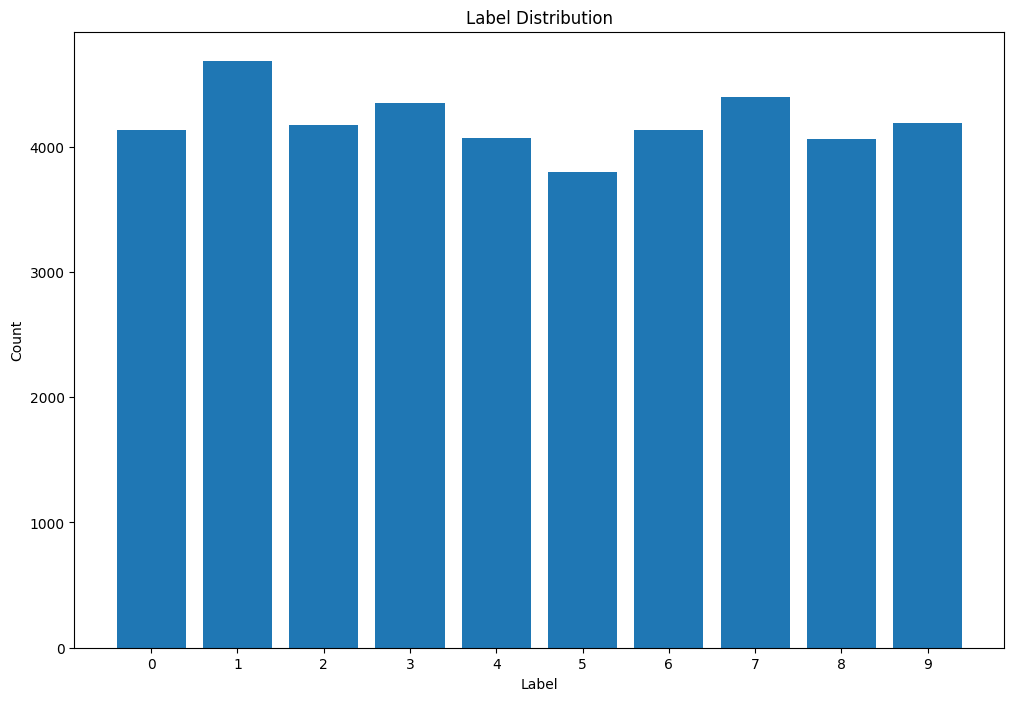

In [8]:
plt.figure(figsize = (12,8))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(label_counts.index)
plt.show()

In [9]:
X_train_torch = torch.tensor(X_train / 255.0, dtype = torch.float32)
y_train_torch = torch.tensor(y_train, dtype = torch.long)
test_Data = torch.tensor(df_test.values / 255.0, dtype = torch.float32)

In [10]:
class_names = y_train_torch.unique().tolist()
class_num = len(class_names)
class_names, class_num

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 10)

In [11]:
print(X_train_torch.shape, ' => [data_Size, height * width]')
X_train_torch = X_train_torch.reshape(-1, 1, 28, 28)
print(X_train_torch.shape, ' => [data_size, channels, height, width]')

torch.Size([42000, 784])  => [data_Size, height * width]
torch.Size([42000, 1, 28, 28])  => [data_size, channels, height, width]


In [12]:
torch.manual_seed(247)

df = TensorDataset(X_train_torch, y_train_torch)

train_dataset, val_dataset = random_split(df, [0.8, 0.2])